GA data science challenge - Farshad Nasiri


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

                        PART ONE - PREDICTIVE MODELING

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [1]:
# Import packages and libraries

import scipy
from scipy.spatial import *
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from IPython.display import clear_output

# File path to the dataset and the header file.
file_path = '/Users/fnasiri/Google Drive/DS_projects/general_assembly/data/'

# Load the header file and print. The column names are presented in lines.
# Therefore designate each line as an entry of col_headers.
header_file = open(file_path+'field_names.txt', 'r') 
col_headers=header_file.read().splitlines()

print('Headers from the file:\n',col_headers,'\n')

# Read the dataset and choose col_headers as the column names
data = pd.read_csv(file_path+'breast-cancer.csv', names=col_headers, header=None)

Headers from the file:
 ['ID', 'diagnosis', 'radius_mean', 'radius_sd_error', 'radius_worst', 'texture_mean', 'texture_sd_error', 'texture_worst', 'perimeter_mean', 'perimeter_sd_error', 'perimeter_worst', 'area_mean', 'area_sd_error', 'area_worst', 'smoothness_mean', 'smoothness_sd_error', 'smoothness_worst', 'compactness_mean', 'compactness_sd_error', 'compactness_worst', 'concavity_mean', 'concavity_sd_error', 'concavity_worst', 'concave_points_mean', 'concave_points_sd_error', 'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error', 'symmetry_worst', 'fractal_dimension_mean', 'fractal_dimension_sd_error', 'fractal_dimension_worst'] 



In [2]:
# Print a few lines of the dataset.
data.head(4)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


In [3]:
# Print the properties of the dataset

print('Number of observations:',data.shape[0])
print('Number of features:',data.shape[1])
print('Data types:\n',data.dtypes,'\n')  # Variable type in each column

# Check for missing values
print('Numner of missing values in each column:\n',data.isnull().sum())

Number of observations: 569
Number of features: 32
Data types:
 ID                              int64
diagnosis                      object
radius_mean                   float64
radius_sd_error               float64
radius_worst                  float64
texture_mean                  float64
texture_sd_error              float64
texture_worst                 float64
perimeter_mean                float64
perimeter_sd_error            float64
perimeter_worst               float64
area_mean                     float64
area_sd_error                 float64
area_worst                    float64
smoothness_mean               float64
smoothness_sd_error           float64
smoothness_worst              float64
compactness_mean              float64
compactness_sd_error          float64
compactness_worst             float64
concavity_mean                float64
concavity_sd_error            float64
concavity_worst               float64
concave_points_mean           float64
concave_points_sd_error 

In [4]:
# FOUND NO MISSING VALUES. 

# Checking the class column
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [5]:
# Factorizing the class column into a numerical one.
# We drop the original categorical class column and add the numerical one
# to the end of the dataset


data['diag']=data['diagnosis'].factorize(['B','M'])[0]
data.drop(['diagnosis'],axis=1, inplace=True)
data['diag']=data['diag'].astype(float)

In [6]:
# Defining function to compute compactnes. In the first step, it computes the average distance
# of points within array1. In the second step, the avarage distance of points in array1 from 
# points in array2 is computed. The function returns the ratio of the two calculations.

def compactness(array1, array2):
    if (array1.shape[1] != array2.shape[1]):
        return print('Different dimensions!')
    else:
        dist1=distance.cdist(array1, array1, 'euclidean')
        dist2=distance.cdist(array1, array2, 'euclidean')
        return (dist1.sum()/dist1.size)/(dist2.sum()/dist2.size)

In [7]:
# Compute the campactness of the two classes

print('Malignant compactness:',compactness(data[data['diag']==1],data))
print('Benign compactness:',compactness(data[data['diag']==0],data))

Malignant compactness: 1.0873097161213732
Benign compactness: 0.934746929913334


THE COMPACTNESS VALUES ARE VERY CLOSE TO ONE MEANING THAT THE DATA POINTS ARE NOT CLUSTERED
FOR EITHER OF THE CLASSES. THEREFORE KNN METHOD IS NOT A GOOD CHOICE FOR PREDICTION

In [8]:
# Define function to bootstrap data
# n = number of samples
def  bootstrap_resampling(X, n):
    X=pd.DataFrame(X)
    if (n > X.shape[0]):
        print('Warning: n is greater than the dataset size!')
        n = X.shape[0]
    if (n <= 0):
        print('Warning: bad n!')
    sample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_sample = X.iloc[sample_i,:]
    return X_sample

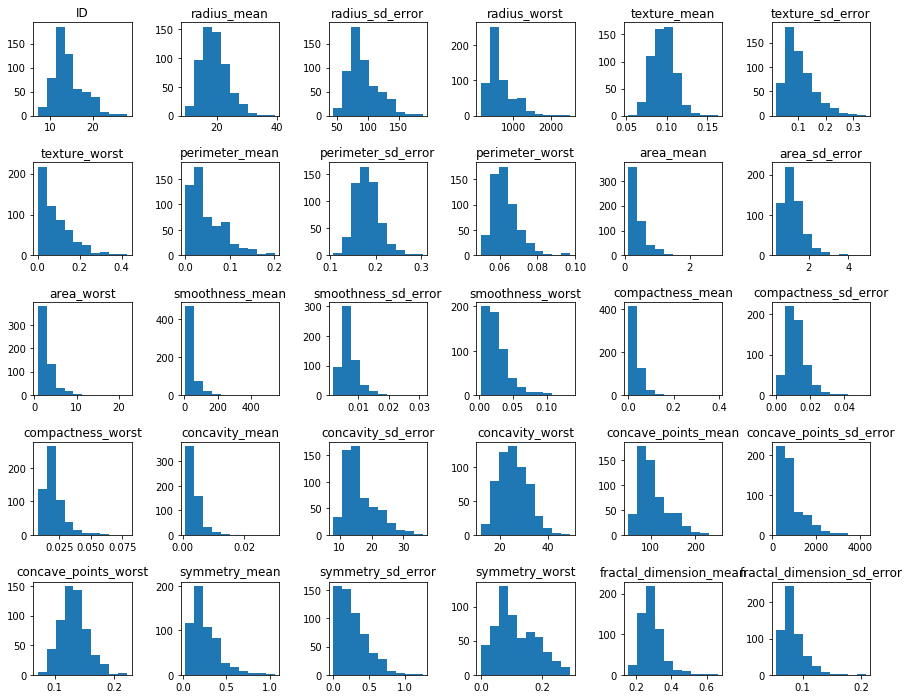

In [9]:
# Plot the histograms of all the features and visually inspect each. 
# This gives us an idea of the distribution of different factors. 
# To highlight the importance of this, take area_mean as an example.
# Its distribution looks like a Poisson distribution. 
# Knowing the shape of the distribution, if one were
# to omit "outliers" by dropping the points that are more than two standard deviations away 
# from the mean, it's best to do it only on the right side. 

column_names=data.columns
fig, axes = plt.subplots(5, 6,figsize=(15,12))
fig.subplots_adjust(hspace = 0.5, wspace=0.5)
axes = axes.ravel()
for i in range(1,data.shape[1]-1):
    axes[i-1].hist(data.iloc[:,i])
    axes[i-1].set_title(column_names[i-1],size=12)

In [96]:
## Print a summary of the data and check for irregularities such as too large/small a max/min values, etc.
data.describe()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst,diag
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [11]:
# Feature Selection.
# Here we first identify the columns that are highly correlated with one another then
# only keep one.
# In the next step, we drop the columns with low variation.
############################################################################
# Note that there are other strategies possible such as the K-Best method  #
# or Principal Component Analysis.                                         #
############################################################################
data.drop(columns=['ID'], axis=1, inplace=True) # Drop the ID column

# Create Pearson correlation matrix
corr_matrix = data.iloc[:,:-1].corr().abs()

# Select upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.5
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

print(to_drop) # Features to be dropped based on high correlation

# Drop highly correlated features
data.drop(columns=to_drop, axis=1, inplace=True)

# Dropping features with low variance
from sklearn.feature_selection import VarianceThreshold

ft_select=VarianceThreshold(threshold=0.01);
data_new = ft_select.fit_transform(data.iloc[:,:-1], data.iloc[:,-1])

## WE END UP WITH THREE FEATURES

['radius_worst', 'texture_mean', 'texture_worst', 'perimeter_mean', 'perimeter_sd_error', 'perimeter_worst', 'area_mean', 'area_sd_error', 'smoothness_mean', 'smoothness_sd_error', 'compactness_mean', 'compactness_sd_error', 'compactness_worst', 'concavity_sd_error', 'concavity_worst', 'concave_points_mean', 'concave_points_sd_error', 'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error', 'symmetry_worst', 'fractal_dimension_mean', 'fractal_dimension_sd_error', 'fractal_dimension_worst']


In [21]:
# Separating inputs and responses

X=data.iloc[:,ft_select.get_support()]
Y=data.iloc[:,-1]

print(Y.value_counts())

# Data is fairly balanced

0.0    357
1.0    212
Name: diag, dtype: int64


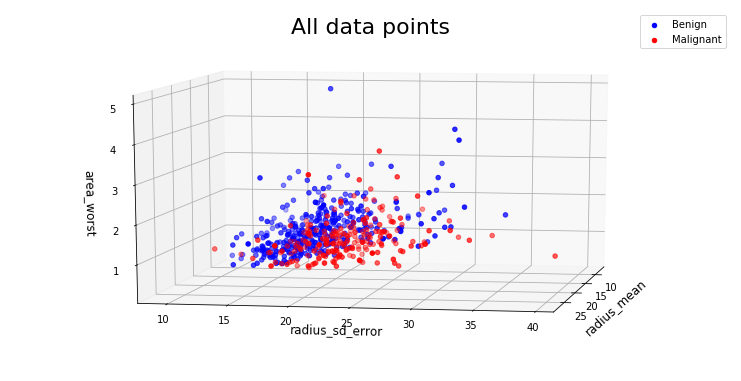

In [99]:
# Plot the 3-D space of the variables and color-code based on class.

#%matplotlib notebook    # ENABLE FOR INTERACTIVE 3D PLOT
benign=X[data['diag']==0]
malignant=X[data['diag']==1]

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,5))
ax = Axes3D(fig)
ax.view_init(10, 10)
sp1=ax.scatter(np.asarray(benign.iloc[:,0]),
           np.asarray(benign.iloc[:,1]),
           np.asarray(benign.iloc[:,2]), s=20 , c='b',label='Benign')
sp2=ax.scatter(np.asarray(malignant.iloc[:,0]),
           np.asarray(malignant.iloc[:,1]),
           np.asarray(malignant.iloc[:,2]), s=20 , c='r',label='Malignant')
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
plt.title('All data points',size=22)
ax.set_xlabel(X.columns[0],size=12)
ax.set_ylabel(X.columns[1],size=12)
ax.set_zlabel(X.columns[2],size=12)
plt.legend(handles=[sp1, sp2])
plt.show() 


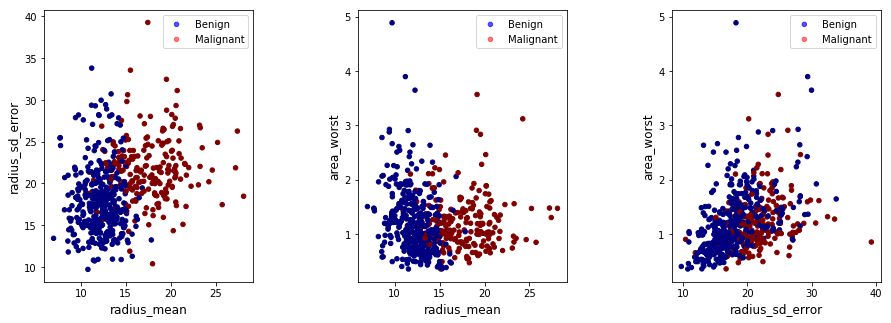

In [100]:
# Plot the variables against each other, color-code by class

norm = mpl.colors.Normalize(vmin=0, vmax=1)
cmap = cm.jet
m = cm.ScalarMappable(norm=norm, cmap=cmap)
c1 = m.to_rgba(np.array(Y))

fig, axes = plt.subplots(1, 3,figsize=(15,5))
fig.subplots_adjust(hspace = 0.5, wspace=0.5)
axes = axes.ravel()
axes[0].scatter(np.asarray(X.iloc[:,0]),
                np.asarray(X.iloc[:,1]), s=20 , c=c1)
axes[0].set_xlabel(X.columns[0],size=12)
axes[0].set_ylabel(X.columns[1],size=12)
axes[0].legend(handles=[sp1, sp2])

axes[1].scatter(np.asarray(X.iloc[:,0]),
                np.asarray(X.iloc[:,2]), s=20 , c=c1)
axes[1].set_xlabel(X.columns[0],size=12)
axes[1].set_ylabel(X.columns[2],size=12)
axes[1].legend(handles=[sp1, sp2])

axes[2].scatter(np.asarray(X.iloc[:,1]),
                np.asarray(X.iloc[:,2]), s=20 , c=c1)
axes[2].set_xlabel(X.columns[1],size=12)
axes[2].set_ylabel(X.columns[2],size=12)
axes[2].legend(handles=[sp1, sp2])


In the first two plots, the classes are well separated and there is not a
pattern of linear correlation -i.e. data aligning along the x=y line- as expected.
In particulare, radius_mean appears to separate the data fairly well.
The third plot shows more overlap of the classes and the linear correlation 
of the two variables is stronger in comparison to the other two plots.
Variation in all three plots is significant as expected.

Modeling: We will implement two models. Logistic Regression and Support Vector Machines (SVM).

Since we are creating a model to predict instances of benign or malignant cancer, it is reasonable to assume that 
the main goal is to minimize the number of malignant cancer cases that go undetected (false negatives) 
at the cost of false positives (false positives can be investigated with additional medical tests and found to be benign but undetected malignant cancer may lead to life threatening circumstances).
Therefore we choose recall to be the model parameter we want to maximize.
A more advanced way would be to use a F-score, and setting the Beta parameter in such way that it reflects the importance of recall over precision.

Managing overfittig:

We have already omitted extra features which helps avoid overfitting.
The number of data points is somewhat low. Therefore, if possible, 
adding data points will help avoid overfitting.
We will separate 30 percent of the dataset as the holdout set and
perform a K-fold procedure on the remaining data per hyperparameter value.
Once we have found the hyperparameter value that maximizes recall,
we will do a final evaluation using the unseen data (holdout set).
Other methods such as interupt-mid-iteration maybe investigated if 
results are not satisfactory.

Logistic Regression Model
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [101]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

# Load performance metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score,recall_score, precision_score

# Split the dataset
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.3)

# Load model
from sklearn.linear_model import LogisticRegression
#########
# L2 penalty since we have already eliminated a lot of the features
# Smaller C value gives stronger regularization
# Small dataset so liblinear solver is fast enough

for c in np.linspace(0.1,1,10):
    lrModel=LogisticRegression(penalty='l1', tol=0.0001, C=c, fit_intercept=True, 
                               solver='liblinear', 
                               max_iter=1000)
# Using recall as the scoring since it makes sense if we don't want to miss
# truly affected people as much as possible. The cost of a FN is higher than
# the cost of a FP.
# Using 5-fold procedure

    scores = cross_val_score(lrModel, X_train,y_train, cv=5, scoring='recall')
    print('Recall (95%) at c=',c,': ',"%0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    
    
# C =1.0 works well.  
lrModel=LogisticRegression(penalty='l1', tol=0.0001, C=1.0, fit_intercept=True, 
                           solver='liblinear', 
                           max_iter=1000)

lrModel.fit(X_train,y_train)

# Make predictions on the holdout set
y_pred=lrModel.predict(X_test)
print('\n')
print('Accuracy: ',lrModel.score(X_test,y_test) )
print('Confusion Matrix (CM):'); print('TN   FP\n','FN   TP')
print('CM= ',confusion_matrix(y_test,y_pred))
print('Precision:',precision_score(y_test,y_pred)); print('Recall:',recall_score(y_test,y_pred))

Recall (95%) at c= 0.1 :  0.71 (+/- 0.14)
Recall (95%) at c= 0.2 :  0.75 (+/- 0.14)
Recall (95%) at c= 0.30000000000000004 :  0.76 (+/- 0.14)
Recall (95%) at c= 0.4 :  0.77 (+/- 0.12)
Recall (95%) at c= 0.5 :  0.77 (+/- 0.13)
Recall (95%) at c= 0.6 :  0.77 (+/- 0.13)
Recall (95%) at c= 0.7000000000000001 :  0.77 (+/- 0.13)
Recall (95%) at c= 0.8 :  0.78 (+/- 0.11)
Recall (95%) at c= 0.9 :  0.79 (+/- 0.12)
Recall (95%) at c= 1.0 :  0.80 (+/- 0.09)


Accuracy:  0.9005847953216374
Confusion Matrix (CM):
TN   FP
 FN   TP
CM=  [[105   4]
 [ 13  49]]
Precision: 0.9245283018867925
Recall: 0.7903225806451613


The accuracy of the model is high but the parameter of interest is recall. Recall of the model on the unseen data is not too far off from the 95% confidence interval and is fairly good.

In [102]:
print(lrModel.coef_)
print('The most important feature is:',X.columns[np.argmax(lrModel.coef_, axis=1)])

[[ 0.85639171  0.16312804 -0.11347277]]
The most important feature is: Index(['radius_mean'], dtype='object')


    SVM Model
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [108]:
# Split the dataset
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.3)

from sklearn.svm import SVC
#########
# Smaller C value gives stronger regularization
# Using linear kernel helps avoid overfitting at the cost of bias

for c in np.linspace(0.1,1,10):
    svcModel=SVC(C=c, kernel='linear', 
                 gamma='auto', coef0=0.0, shrinking=True, 
                 probability=False, tol=0.0001, cache_size=200, 
                 max_iter=-1)

    scores = cross_val_score(svcModel, X_train,y_train, cv=5, scoring='recall')
    print('Recall (95%) at c=',c,': ',"%0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


# C = 0.4 works well.  
svcModel=SVC(C=0.4, kernel='linear', 
            gamma='auto', coef0=0.0, shrinking=True, 
            probability=False, tol=0.0001, cache_size=200, 
            max_iter=-1)

svcModel.fit(X_train,y_train)

# Make predictions on the holdout set
y_pred=svcModel.predict(X_test)
print('\n')
print('Accuracy: ',svcModel.score(X_test,y_test) )
print('Confusion Matrix (CM):'); print('TN   FP\n','FN   TP')
print('CM= ',confusion_matrix(y_test,y_pred))
print('Precision:',precision_score(y_test,y_pred)); print('Recall:',recall_score(y_test,y_pred))

Recall (95%) at c= 0.1 :  0.82 (+/- 0.13)
Recall (95%) at c= 0.2 :  0.82 (+/- 0.13)
Recall (95%) at c= 0.30000000000000004 :  0.81 (+/- 0.13)
Recall (95%) at c= 0.4 :  0.81 (+/- 0.13)
Recall (95%) at c= 0.5 :  0.81 (+/- 0.13)
Recall (95%) at c= 0.6 :  0.81 (+/- 0.13)
Recall (95%) at c= 0.7000000000000001 :  0.81 (+/- 0.14)
Recall (95%) at c= 0.8 :  0.81 (+/- 0.14)
Recall (95%) at c= 0.9 :  0.81 (+/- 0.14)
Recall (95%) at c= 1.0 :  0.81 (+/- 0.14)


Accuracy:  0.8830409356725146
Confusion Matrix (CM):
TN   FP
 FN   TP
CM=  [[100   8]
 [ 12  51]]
Precision: 0.864406779661017
Recall: 0.8095238095238095


In [109]:
print(svcModel.coef_)
print('The most important feature is:',X.columns[np.argmax(lrModel.coef_, axis=1)])

[[ 0.63981353  0.15239553 -0.06028919]]
The most important feature is: Index(['radius_mean'], dtype='object')


An alternative way of stablishing the dominant feature is to remove each feature in turn, train the model with the remaining ones and compare to the benchmark results (in case there are more than a few features, we can track the evolution of the ROC curve instead).

Model is performing within expected margins and slighlty better than logistic regression.

Given the plots of the variables against each other, it is clear that radius_mean distinguishes 
the two classes well and the overlap is marginal. Whichever model we use, the error will come from 
the border between the two classes with respect to radius_mean. SVM is typically better 
than The logistic regression in defining the border but could lead to overfitting.
Since we have taken measures to avoid overfitting as much as possible, it is expected that 
the two models perform with comparable accuracy.

Explanation to technical audiences:
The two models perform fairly well given the main goal of maximizing recall. Having said that, the dataset is fairly small and therefore a further addition of data would make the models more reliable. As the next step, we can perform a PCA analysis to identify the most important components in the feature space and fit the models again to see if the results improve. Removing the outliers will also help improve the results.

Explanation to non-technical audiences:
We are using data that describe characteristics of the cell nuclei in order to learn which cancer cells are benign and which are malignant. Using this model, we can then predict if a cell is malignant by knowing its features. The model works by identifying those characteristics that differentiate benign and malignant cells. It shows a resonable performance, being able to identify about 80% of patients with malignant cells.

Factors that contributed to malignant vs benign tumor identification:
The mean radius appears to be an important factor in identifying the type of the tumor. A mean radius above 15 is signifying a malignant cancer cell.

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

                    PART TWO - HOMEWORK ASSESMENT
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [ ]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn import LinearRegression # Linear regression is part of sklearn.linear_model
from sklearn.cross_validation import cross_val_score # cross_val_score can be loaded from sklearn.model_selection

# Load data
d = pd.read_csv('../data/train.csv')

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Always take a look at the data. Look for missing values. 
# Look for values that are "out-of-place" i.e too large, too small etc.
# Look at the variable types. Check if any cleaning is needed.
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


# Setup data for prediction

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
x1 = data.SalaryNormalized
# The data file was imported as "d"! SalaryNormalized is not an attribute of the dataframe structure.
# Use d.['SalaryNormalized'] instead.

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
x2 = pd.get_dummies(data.ContractType)
# Refer to the comments for x1.
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Setup model
model = LinearRegression()
# Take a look at the manual for the linear regression model at:
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# See if there are ways to configure your model to make it better.
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Evaluate model
from sklearn.cross_validation import cross_val_score  # Has been imported already 
from sklearn.cross_validation import train_test_split # train_test_split can be imported from sklearn.model_selection

# Always have a holdout set to test the final model unless you have a separate test set.
# Features come first (Xs), responses second (Ys). Flip the position of x1 and x2.
# When K-folding, k needs to be greater than 1 !
# Why did you choose mean_absolute_error as the scoring parameter? What other options are available?
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
print(scores.mean()) # What about the confidence intervals??

In [ ]:
#!/usr/bin/env python
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score # cross_val_score can be loaded from sklearn.model_selection

# Load data
data = pd.read_csv('../data/train.csv')

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Always take a look at the data. Look for missing values. 
# Look for values that are "out-of-place" i.e too large, too small etc.
# Look at the variable types. Check if any cleaning is needed.
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Setup data for prediction
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
y = data.SalaryNormalized
# The data file was imported as "d"! SalaryNormalized is not an attribute of the dataframe structure.
# Use d.['SalaryNormalized'] instead.
X = pd.get_dummies(data.ContractType)
# We typically use X to denote the features and Y to denote responses.
# Technically, you can use whichever variable name you like but it's 
# good practice to follow accepted conventions when it comes to notation.
# It makes your code easier to understand.
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Setup model
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
model = LinearRegression()
# Take a look at the manual for the linear regression model at:
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# See if there are ways to configure yout model to make it better.
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Evaluate model
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Always have a holdout set to test the final model unless you have a separate test set.
# You can use sklearn.model_selection.train_test_split
# Why did you choose mean_absolute_error as the scoring parameter? What other options are available?
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())